# Hands-On Activity 2.3 : Regularization
Submitted By: Labbao, Benedick D.<br>
Performed On: 01/23/2024<br>
Submitted On: 01/26/2024

Submitted To: Engr. Roman M. Richard

---

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2024-02-19 11:09:41.191309: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 11:09:43.710075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 11:09:43.710190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 11:09:44.111276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 11:09:44.953124: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 11:09:44.954729: I tensorflow/core/platform/cpu_feature_guard.cc:1

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [5]:
y_train[333]

8

Check the actual image

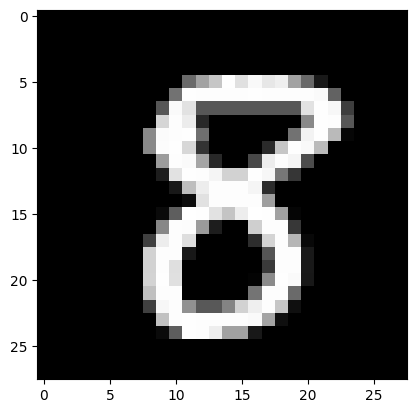

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [9]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = 0.001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30


2024-02-19 11:09:58.480121: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


347/469 [=====================>........] - ETA: 0s - loss: 0.5939 - accuracy: 0.8227

457/469 [============================>.] - ETA: 0s - loss: 0.5273 - accuracy: 0.8426

2024-02-19 11:10:00.962152: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 4ms/step - loss: 0.5213 - accuracy: 0.8445 - val_loss: 0.2062 - val_accuracy: 0.9377
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9254 - val_loss: 0.1640 - val_accuracy: 0.9503
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2026 - accuracy: 0.9401 - val_loss: 0.1299 - val_accuracy: 0.9613
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1752 - accuracy: 0.9487 - val_loss: 0.1156 - val_accuracy: 0.9651
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.9530 - val_loss: 0.1099 - val_accuracy: 0.9679
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9560 - val_loss: 0.1082 - val_accuracy: 0.9674
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1373 - accuracy: 0.9592 - val_loss: 0.0988 - val_accuracy: 0.9717
Epoch 8/30
469/46

Use Keras evaluate function to evaluate performance on the test set

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2024-02-19 11:10:40.209343: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


Test loss: 0.09796252846717834
Test accuracy: 0.9761000275611877


The accuracy results were high because the model was able to be trained on data that was regularized, this resulted in a model that will not easily underfit or overfit.

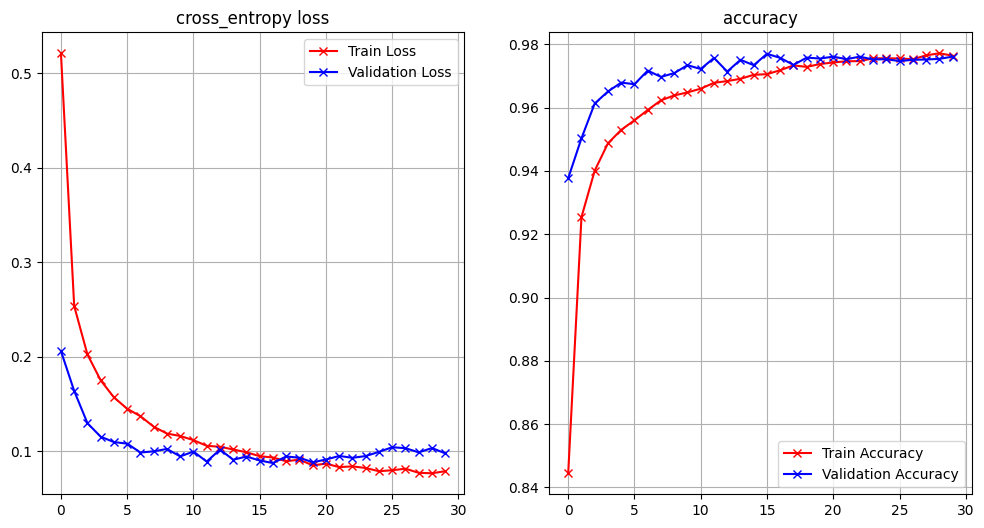

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

using dropout as regularization technique, the results shown has steady change in the accuracy and loss with little difference, this indicates that the model is not overfitting or underfitting.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [36]:
import pandas as pd

# I used Apple Quality dataset from https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
apple_quality_df = pd.read_csv('dataset/apple_quality.csv')
apple_quality_df.drop('A_id', axis=1, inplace=True)
apple_quality_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [46]:
apple_quality_df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [45]:
apple_quality_df.shape

(4000, 8)

In [37]:
quality = {'good': 1, 'bad': 0}
apple_quality_df['Quality'] = apple_quality_df['Quality'].map(quality)
apple_quality_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


data contains 7 features that have already been cleaned and scaled

In [47]:
from sklearn.model_selection import train_test_split

X = apple_quality_df.drop('Quality', axis=1)
y = apple_quality_df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

print(X_train.shape)
print(X_test.shape)

(2800, 7)
(1200, 7)


splitting the data by 30% testing data and 70% training data since we only have 4000 records

In [123]:
model_1 = Sequential()

model_1.add(Dense(400, activation='relu', input_shape=(7,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(1, activation='sigmoid'))

model_1 consisting of 2 hidden layers with size of 400 and 300, along with dropouts of 0.4 as stated in the specifications

In [124]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 400)               3200      
                                                                 
 dropout_42 (Dropout)        (None, 400)               0         
                                                                 
 dense_64 (Dense)            (None, 300)               120300    
                                                                 
 dropout_43 (Dropout)        (None, 300)               0         
                                                                 
 dense_65 (Dense)            (None, 1)                 301       
                                                                 
Total params: 123801 (483.60 KB)
Trainable params: 123801 (483.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
learning_rate = 0.001
model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/20


22/22 [==============================] - 1s 10ms/step - loss: 0.4656 - accuracy: 0.7686 - val_loss: 0.3717 - val_accuracy: 0.8225
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 0.3664 - accuracy: 0.8404 - val_loss: 0.3367 - val_accuracy: 0.8492
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3441 - accuracy: 0.8429 - val_loss: 0.3267 - val_accuracy: 0.8600
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.8600 - val_loss: 0.3033 - val_accuracy: 0.8658
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.8618 - val_loss: 0.2926 - val_accuracy: 0.8758
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8679 - val_loss: 0.2928 - val_accuracy: 0.8733
Epoch 7/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2891 - accuracy: 0.8771 - val_loss: 0.2875 - val_accuracy: 0.8742
Epoch 8/20
22/22 [============

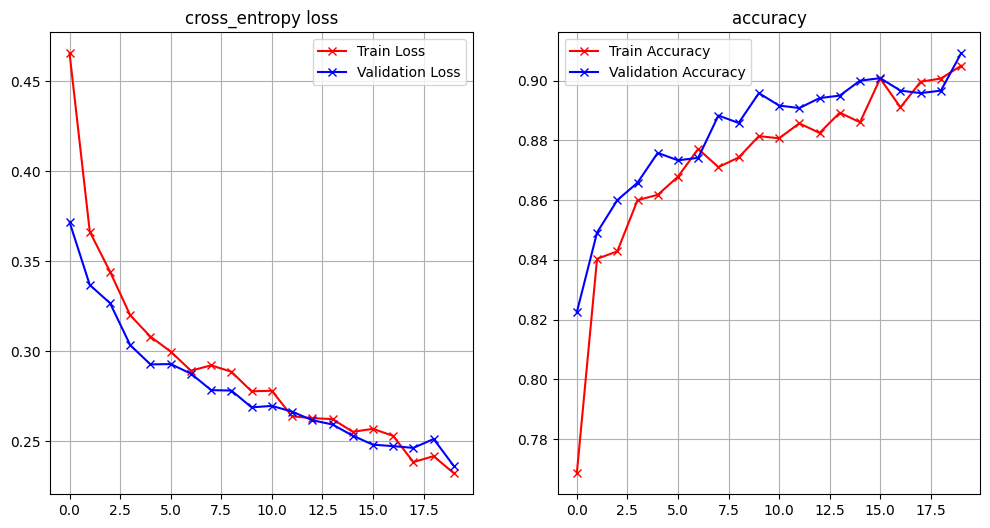

In [126]:
plot_loss_accuracy(history_1)

In [127]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23603522777557373
Test accuracy: 0.909166693687439


In [118]:
model_2 = Sequential()

model_2.add(Dense(400, activation='relu', kernel_regularizer=keras.regularizers.L1(0.0001), input_shape=(7, )))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=keras.regularizers.L1(0.0001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(1, activation='sigmoid'))

In model_2, I used L1 regularization with value of 0.01 to all hidden layers

In [119]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 400)               3200      
                                                                 
 dropout_40 (Dropout)        (None, 400)               0         
                                                                 
 dense_61 (Dense)            (None, 300)               120300    
                                                                 
 dropout_41 (Dropout)        (None, 300)               0         
                                                                 
 dense_62 (Dense)            (None, 1)                 301       
                                                                 
Total params: 123801 (483.60 KB)
Trainable params: 123801 (483.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
learning_rate = 0.0005
model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 5000

early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

history_2 = model_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/5000


22/22 [==============================] - 1s 10ms/step - loss: 1.0871 - accuracy: 0.7343 - val_loss: 0.9734 - val_accuracy: 0.8058
Epoch 2/5000
22/22 [==============================] - 0s 5ms/step - loss: 0.9588 - accuracy: 0.8136 - val_loss: 0.9145 - val_accuracy: 0.8233
Epoch 3/5000
22/22 [==============================] - 0s 5ms/step - loss: 0.9059 - accuracy: 0.8346 - val_loss: 0.8632 - val_accuracy: 0.8458
Epoch 4/5000
22/22 [==============================] - 0s 5ms/step - loss: 0.8672 - accuracy: 0.8357 - val_loss: 0.8292 - val_accuracy: 0.8533
Epoch 5/5000
22/22 [==============================] - 0s 8ms/step - loss: 0.8294 - accuracy: 0.8511 - val_loss: 0.8039 - val_accuracy: 0.8508
Epoch 6/5000
22/22 [==============================] - 0s 11ms/step - loss: 0.8043 - accuracy: 0.8536 - val_loss: 0.7774 - val_accuracy: 0.8617
Epoch 7/5000
22/22 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.8575 - val_loss: 0.7516 - val_accuracy: 0.8642
Epoch 8/5000
22/2

added L1 regularization and early stopping

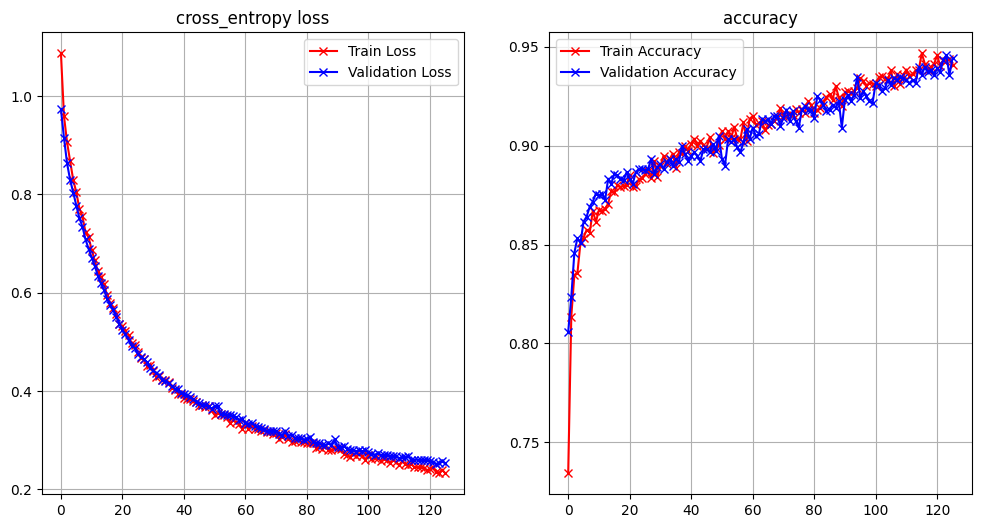

In [121]:
plot_loss_accuracy(history_2)

In [128]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2606416642665863
Test accuracy: 0.9358333349227905


#### Conclusion

In this activity, we training models with regularization techniques in place. In the model that I have created, I used Early Stopping and L1 Regularization to avoid overfitting the model, it also resulted in test results almost close to each other.